In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import palettable
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import graphviz
from IPython.display import Image 
from sklearn.metrics import roc_curve, auc

In [2]:
# Load the csv files over here into pandas data frame
# YOUR CODE HERE
# 0.1
def load_csv(file_name):
  # Input: csv_file_name
  # Output: pandas data frame
    return pd.read_csv(file_name)
data = load_csv('data-1.csv')

In [365]:
data

,Id,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,81,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.00,3.8918,69.0,0.0
1,82,23.0,1.0,22.6,89.0,139.0,64.8,61.0,2.00,4.1897,68.0,0.0
2,83,66.0,2.0,26.2,114.0,255.0,185.0,56.0,4.55,4.2485,92.0,0.0
3,84,60.0,2.0,32.1,83.0,179.0,119.4,42.0,4.00,4.4773,94.0,0.0
4,85,29.0,1.0,30.0,85.0,180.0,93.4,43.0,4.00,5.3845,88.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
284,365,45.0,1.0,24.2,83.0,177.0,118.4,45.0,4.00,4.2195,82.0,0.0
285,366,33.0,1.0,19.5,80.0,171.0,85.4,75.0,2.00,3.9703,80.0,0.0
286,367,60.0,2.0,28.2,112.0,185.0,113.8,42.0,4.00,4.9836,93.0,1.0
287,368,47.0,2.0,24.9,75.0,225.0,166.0,42.0,5.00,4.4427,102.0,0.0


# 1 - Corelation  analysis

              Id       age       sex       bmi        bp        s1        s2  \
Id      1.000000  0.121411  0.027295  0.051202  0.025104  0.070510  0.080649   
age     0.121411  1.000000  0.157702  0.128863  0.302450  0.227035  0.164720   
sex     0.027295  0.157702  1.000000  0.089853  0.217763  0.103408  0.220079   
bmi     0.051202  0.128863  0.089853  1.000000  0.418101  0.223501  0.218968   
bp      0.025104  0.302450  0.217763  0.418101  1.000000  0.215255  0.148075   
s1      0.070510  0.227035  0.103408  0.223501  0.215255  1.000000  0.890445   
s2      0.080649  0.164720  0.220079  0.218968  0.148075  0.890445  1.000000   
s3     -0.048221 -0.017251 -0.380638 -0.321464 -0.157270  0.062102 -0.212704   
s4      0.086302  0.140861  0.370819  0.343483  0.228159  0.533358  0.679930   
s5      0.035220  0.246126  0.153611  0.441695  0.400095  0.479505  0.278267   
s6      0.043368  0.221504  0.177679  0.372562  0.343537  0.284529  0.249830   
target  0.040398  0.167672  0.051792  0.

<AxesSubplot:title={'center':'correlation matrix without the target variable'}>

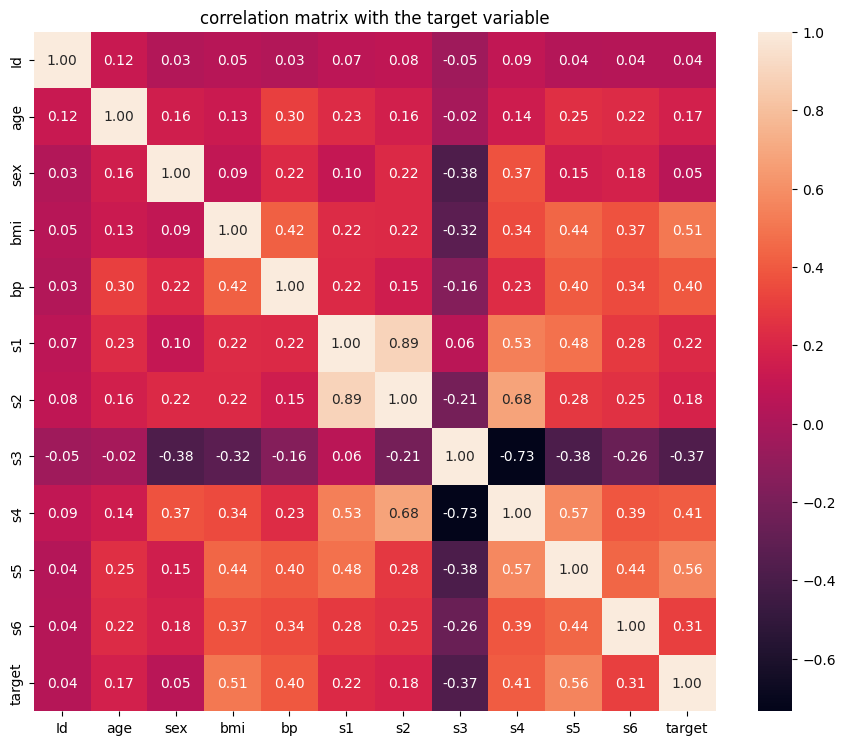

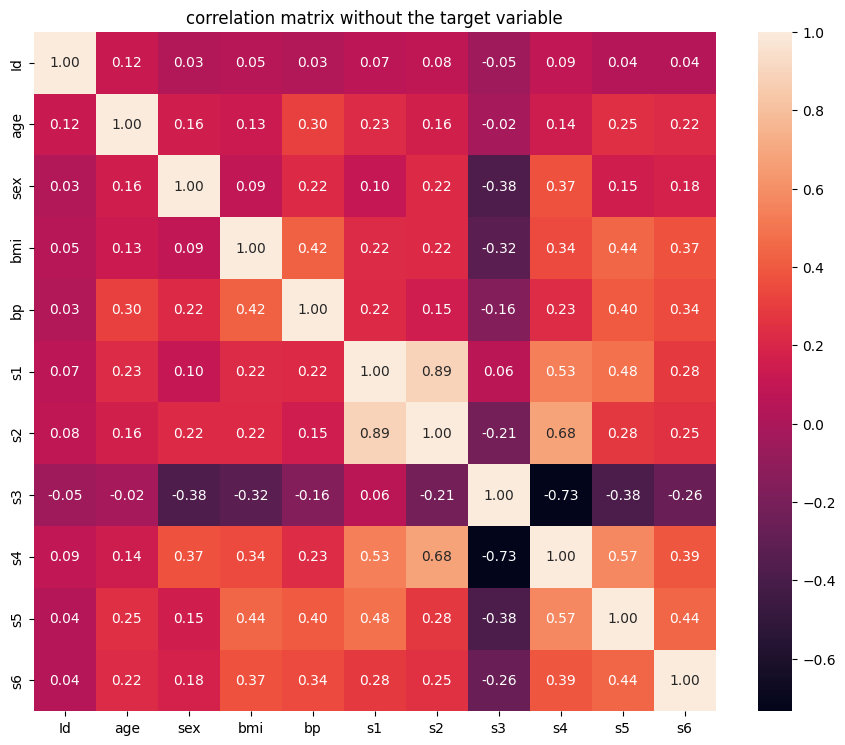

In [368]:
# The correlation matrix is the same as the one we discussed in class.
# HINT - If you are using a dataframe, then pandas.DataFrame.corr and sns.heatmap might be helpful.

# Print the corellation matrix here.
# YOUR CODE HERE
# 1.1
def correlationMatrix(df,target_variable = True):
  # Include an option in the function to find correlation with/without the target variable
  # Output: A heatmap plot of the correlation matrix
  # Hint: Use the definition of correlation matrix to construct one for the features at hand
    if not target_variable: 
        df = df.drop('target',axis = 1)
        
    dfcorr = df.corr()
    plt.figure(figsize=(11, 9),dpi=100)
    
    if target_variable: 
        plt.title('correlation matrix with the target variable')
    else: 
        plt.title('correlation matrix without the target variable')
    print(dfcorr)
    return sns.heatmap(data=dfcorr,
                        #vmax = 0.5,
                        annot = True,
                        fmt=".2f")


# 1.2
# Plot both the heat maps for correlation among just features and one including the target variable
        
correlationMatrix(data,target_variable = True)
correlationMatrix(data,target_variable = False)

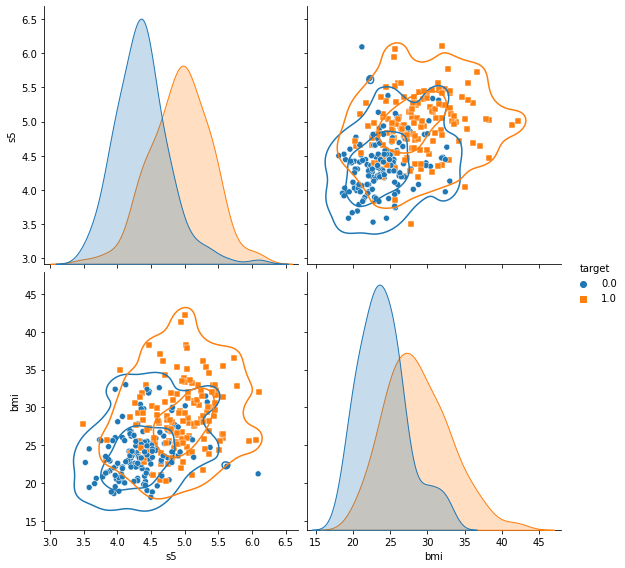

In [76]:
# 1.3
# Add a few scatter plots between the most correlated features and target.
# YOUR CODE HERE
g = sns.pairplot(data[['s5','bmi','target']],
             hue = 'target',
             diag_kind='kde',
             markers=["o", "s"],
            height=4,
            )
g.map_lower(sns.kdeplot, levels=3, color=".2")
g.map_upper(sns.kdeplot, levels=3, color=".2")

# Data normalization and cleaning

In [149]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,48.231061,1.462121,26.246212,94.402727,187.893939,114.390530,50.524621,3.937386,4.620809,90.250000,0.484848
std,12.706830,0.499510,4.269147,13.620285,29.911977,26.274077,11.815371,1.107165,0.489902,10.254462,0.500720
min,19.000000,1.000000,18.100000,62.000000,113.000000,51.000000,29.000000,2.000000,3.496500,66.000000,0.000000
25%,38.000000,1.000000,23.300000,84.000000,166.000000,98.250000,42.000000,3.000000,4.276700,83.000000,0.000000
50%,50.000000,1.000000,25.600000,93.000000,186.000000,113.900000,49.000000,4.000000,4.564300,91.000000,0.000000
75%,57.250000,2.000000,28.925000,104.000000,207.000000,131.550000,59.000000,4.647500,4.964550,97.000000,1.000000
max,79.000000,2.000000,38.300000,131.000000,269.000000,181.200000,83.000000,7.000000,6.056800,117.000000,1.000000


data: age quantile difference: 20.000 lower limit: 8.000 upper limit: 88.000
the number of age error: 0
data: sex quantile difference: 1.000 lower limit: -0.500 upper limit: 3.500
the number of sex error: 0
data: bmi quantile difference: 6.100 lower limit: 13.950 upper limit: 38.350
the number of bmi error: 2
data: bp quantile difference: 21.000 lower limit: 52.500 upper limit: 136.500
the number of bp error: 0
data: s1 quantile difference: 44.500 lower limit: 100.750 upper limit: 278.750
the number of s1 error: 6
data: s2 quantile difference: 34.600 lower limit: 45.700 upper limit: 184.100
the number of s2 error: 4
data: s3 quantile difference: 17.000 lower limit: 16.500 upper limit: 84.500
the number of s3 error: 5
data: s4 quantile difference: 2.000 lower limit: 0.000 upper limit: 8.000
the number of s4 error: 0
data: s5 quantile difference: 0.714 lower limit: 3.217 upper limit: 6.071
the number of s5 error: 2
data: s6 quantile difference: 14.000 lower limit: 62.000 upper limit: 118

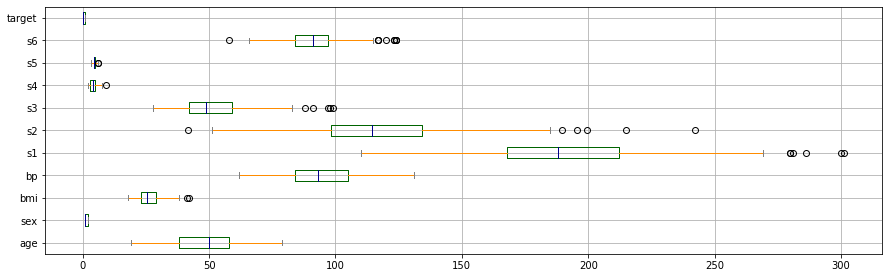

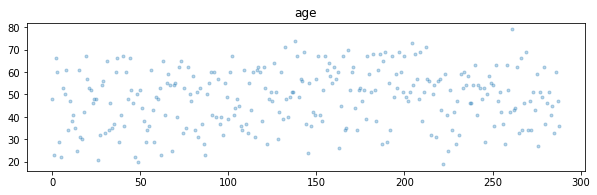

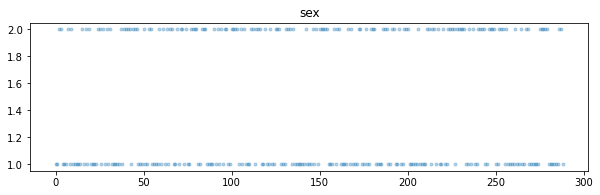

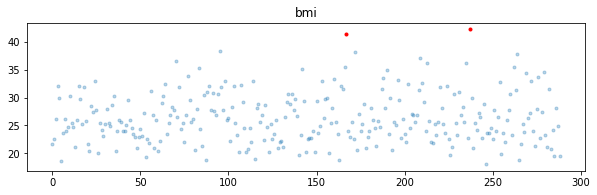

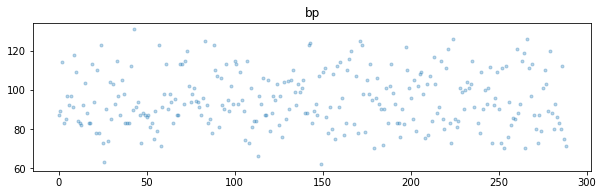

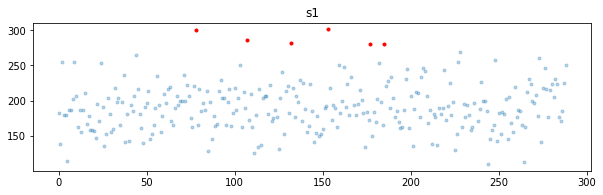

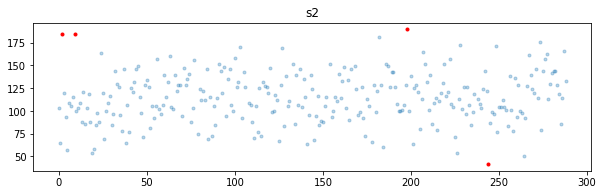

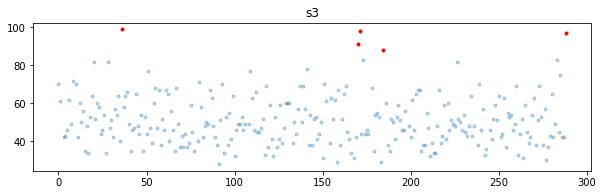

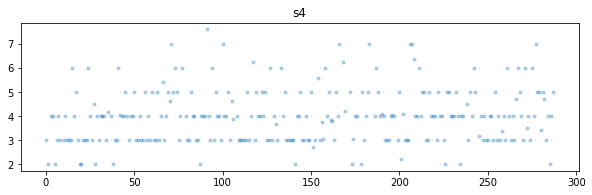

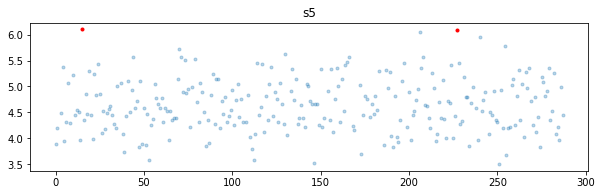

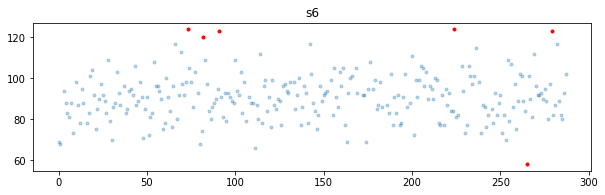

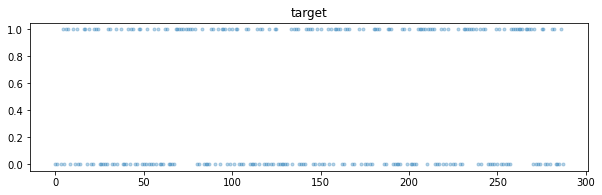

In [3]:
# YOUR CODE HERE
def cleaning(df):
  # Take all the features as input, and do any data cleaning necessary.
    df = df.drop('Id',axis = 1)
    fig = plt.figure(figsize = (15,10))
    ax1 = fig.add_subplot(2,1,1)
    color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
    df.plot.box(vert=False, grid = True,color = color,ax = ax1)
    for col in df.columns:
        
        df_col = df[col]
        df_des = df_col.describe()
        q1 = df_des['25%']
        q3 = df_des['75%']
        iqr = q3 - q1
        mi = q1 - 1.5*iqr
        ma = q3 + 1.5*iqr
        
        print('data:',col,
              'quantile difference: %.3f' %iqr,
              'lower limit: %.3f' %mi,
              'upper limit: %.3f'%ma)
        
        error = df_col[(df_col < mi) | (df_col > ma)]
        print('the number of',col,
              'error:',len(error))
        df_c = df_col[(df_col >= mi) & (df_col <= ma)]
        
        df = df.where(df[col] >= mi) 
        df = df.where(df[col] <= ma)
        df = df.dropna()
        
        fig = plt.figure(figsize = (10,6))
        ax1 = fig.add_subplot(2,1,1)
        plt.title(col)
        plt.scatter(df_c.index,df_c,marker='.',alpha = 0.3)
        plt.scatter(error.index,error,color = 'r',marker='.',alpha = 1)
        
    df = df.dropna()
    df = df.drop_duplicates()
    
    return df

data = cleaning(data)

In [6]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,0.0
1,23.0,1.0,22.6,89.0,139.0,64.8,61.0,2.0,4.1897,68.0,0.0
3,60.0,2.0,32.1,83.0,179.0,119.4,42.0,4.0,4.4773,94.0,0.0
4,29.0,1.0,30.0,85.0,180.0,93.4,43.0,4.0,5.3845,88.0,1.0
5,22.0,1.0,18.6,97.0,114.0,57.6,46.0,2.0,3.9512,83.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
283,41.0,1.0,20.8,86.0,223.0,128.2,83.0,3.0,4.0775,89.0,0.0
284,45.0,1.0,24.2,83.0,177.0,118.4,45.0,4.0,4.2195,82.0,0.0
285,33.0,1.0,19.5,80.0,171.0,85.4,75.0,2.0,3.9703,80.0,0.0
286,60.0,2.0,28.2,112.0,185.0,113.8,42.0,4.0,4.9836,93.0,1.0


In [4]:
# YOUR CODE HERE
def normalizer(df,nor_type): # nor_type: '0_1' , 'z' or 'std'
  # Taken input the output of cleaning function, and perform data normalization independently for all the features.
    if nor_type == '0_1':
        data_0_1 = df.copy()
        scaler_0_1=MinMaxScaler()
        for col in df.columns.drop('target'):
             data_0_1[col] = scaler_0_1.fit_transform(data_0_1[col].values.reshape(-1,1))
        return data_0_1
    elif nor_type == 'z':
        data_z = df.copy()
        for col in df.columns.drop('target'):
            data_z[col] = scale(data_z[col].values.reshape(-1,1))
        return data_z
    else:
        data_std = df.copy()
        std = StandardScaler()
        for col in df.columns.drop('target'):
            data_std[col] = std.fit_transform(data_std[col].values.reshape(-1,1))
        return data_std

In [5]:
data_nor = normalizer(data,nor_type='std')

In [6]:
data_nor

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.018219,-0.926906,-1.090390,-0.544540,-0.163922,-0.426724,1.651439,-0.848263,-1.490900,-2.076205,0.0
1,-1.989401,-0.926906,-0.855707,-0.397421,-1.637699,-1.891017,0.888273,-1.753186,-0.881663,-2.173908,0.0
3,0.927949,1.078858,1.373789,-0.838777,-0.297902,0.191024,-0.722856,0.056661,-0.293492,0.366389,0.0
4,-1.516317,-0.926906,0.880953,-0.691659,-0.264407,-0.800424,-0.638060,0.056661,1.561826,-0.219833,1.0
5,-2.068249,-0.926906,-1.794442,0.191054,-2.475072,-2.165572,-0.383671,-1.753186,-1.369420,-0.708352,0.0
...,...,...,...,...,...,...,...,...,...,...,...
283,-0.570150,-0.926906,-1.278137,-0.618099,1.175875,0.526591,2.753791,-0.848263,-1.111124,-0.122130,0.0
284,-0.254760,-0.926906,-0.480213,-0.838777,-0.364892,0.152892,-0.468467,0.056661,-0.820719,-0.806056,0.0
285,-1.200928,-0.926906,-1.583226,-1.059455,-0.565861,-1.105485,2.075421,-1.753186,-1.330359,-1.001463,0.0
286,0.927949,1.078858,0.458522,1.294444,-0.096932,-0.022518,-0.722856,0.056661,0.741944,0.268685,1.0


# 2 - Model training and testing

In [8]:
# Splitting the dataset into train, val and test sets.
# 2.0
X = np.array(data_nor.drop(['target'],axis = 1))
y = np.array(data_nor['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [293]:
np.shape(X_train)

(211, 10)

In [9]:
# Code for Logistic Regression.
# Code for Decision Tree.
# YOUR CODE HERE

# 2.1
def LogisticRegression_(X_train,y_train,X_test,y_test):
  # You can use the LR sci-kit learn solver but capture any other hyper-parameter settingsor model settings in this method 
    lr = LogisticRegression(tol = 1e-5)
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    return y_pred,lr
# 2.2
def DecisionTree_(X_train,y_train,X_test,y_test):
  # You can use the DecisionTree sci-kit learn solver but capture any other hyper-parameter settings
  # or model settings in this method
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,min_weight_fraction_leaf=0.01)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    return y_pred, clf

In [10]:
y_pred,DT_model = DecisionTree_(X_train,y_train,X_test,y_test)
y_pred_lr,LR_model = LogisticRegression_(X_train,y_train,X_test,y_test)

In [257]:
for i in range(1,20):
    rf = RandomForestClassifier(
        criterion='entropy',
        n_estimators=i, 
         max_depth=5,
        min_samples_split=10, 
        min_weight_fraction_leaf=0.05 
        )

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    print("i=number_of_trees=:",i,',accuricy=',accuracy_score(y_test, y_pred))

i=number_of_trees=: 1 ,accuricy= 0.7547169811320755
i=number_of_trees=: 2 ,accuricy= 0.8113207547169812
i=number_of_trees=: 3 ,accuricy= 0.7735849056603774
i=number_of_trees=: 4 ,accuricy= 0.8679245283018868
i=number_of_trees=: 5 ,accuricy= 0.8301886792452831
i=number_of_trees=: 6 ,accuricy= 0.8679245283018868
i=number_of_trees=: 7 ,accuricy= 0.8490566037735849
i=number_of_trees=: 8 ,accuricy= 0.8301886792452831
i=number_of_trees=: 9 ,accuricy= 0.7547169811320755
i=number_of_trees=: 10 ,accuricy= 0.8113207547169812
i=number_of_trees=: 11 ,accuricy= 0.8867924528301887
i=number_of_trees=: 12 ,accuricy= 0.8490566037735849
i=number_of_trees=: 13 ,accuricy= 0.8867924528301887
i=number_of_trees=: 14 ,accuricy= 0.7924528301886793
i=number_of_trees=: 15 ,accuricy= 0.8113207547169812
i=number_of_trees=: 16 ,accuricy= 0.7924528301886793
i=number_of_trees=: 17 ,accuricy= 0.7924528301886793
i=number_of_trees=: 18 ,accuricy= 0.7924528301886793
i=number_of_trees=: 19 ,accuricy= 0.8113207547169812


In [386]:
# Create function which calculates F1score, precision, recall and accuracy score for true and predicted labels.
# 2.3
def metrics(y_test, y_pred):
  # Your code here for precision, recall, F1score, accuracy
  # You can call this code to compute metrics for your models
    con_matrix = confusion_matrix(y_test, y_pred)
    cla_report = classification_report(y_test, y_pred)
    acc_score = accuracy_score(y_test, y_pred)
    f1_score_ = f1_score(y_test, y_pred)
    print('Logistic Regression')
    print('confusion_matrix:')
    print(con_matrix)
    print('---------------------------------')
    print('classification_report:')
    print(cla_report)
    print('---------------------------------')
    print('accuracy_score:')
    print(acc_score)
    print('---------------------------------')
    print('f1_score:')
    print(f1_score_)

In [379]:
metrics(y_test, y_pred)

Decision Tree
confusion_matrix:
[[19 10]
 [ 6 18]]
---------------------------------
classification_report:
              precision    recall  f1-score   support

         0.0       0.76      0.66      0.70        29
         1.0       0.64      0.75      0.69        24

    accuracy                           0.70        53
   macro avg       0.70      0.70      0.70        53
weighted avg       0.71      0.70      0.70        53

---------------------------------
accuracy_score:
0.6981132075471698
---------------------------------
f1_score:
0.6923076923076924


In [388]:
metrics(y_test, y_pred_lr)

Logistic Regression
confusion_matrix:
[[22  7]
 [ 4 20]]
---------------------------------
classification_report:
              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80        29
         1.0       0.74      0.83      0.78        24

    accuracy                           0.79        53
   macro avg       0.79      0.80      0.79        53
weighted avg       0.80      0.79      0.79        53

---------------------------------
accuracy_score:
0.7924528301886793
---------------------------------
f1_score:
0.7843137254901961


# 3 - Feature importance

In [202]:
X = np.array(data_nor.drop(['target'],axis = 1))
y = np.array(data_nor['target'])

In [185]:
# Look into using suitable functions from sklearn. Explain your code and findings clearly in the report document.
# YOUR CODE HERE
# 3.1

def FeatureSelection(X,y,dataset,k,d_type='ETC'): # d_type:'ETC' or 'MIC'
  # Your code can based on measures of information gain or other feature selection methods
  # Input: k - Number of features to pick
  # Output should be a ranked list of features
    d = {}
    if d_type == 'MIC':
        result = mutual_info_classif(X, y, discrete_features= False)
    elif d_type == 'ETC':
        forest = ExtraTreesClassifier(n_estimators=250, random_state=0).fit(X,y)
        result = forest.feature_importances_
    else:
        return False
    
    dataset = list(dataset.columns)
    dataset.remove('target')
    
    for i in range(len(X[1])):
        d[p[i]] = result[i]
    re = sorted(d.items(),key = lambda v:v[1])
    re.reverse()
    
    if k > len(X[1]): 
        k = len(X[1])
    if not k:
        return False

    indices = np.argsort(result)[::-1]
    plt.bar(range(10), result[indices])
    plt.xticks(range(X.shape[1]), [dataset[i] for i in indices])
    plt.show()
    
    return re[:k]

# 3.2 Do the features identified by information gain measures in the FeatureSelection correlate with your model weights for LR/ top features in your Decision Tree model?

'''
Basically yes. Between these two sets of data, 
the ranking of each data can basically be correlated one-to-one, 
but there will be some differences due to different methods.
'''

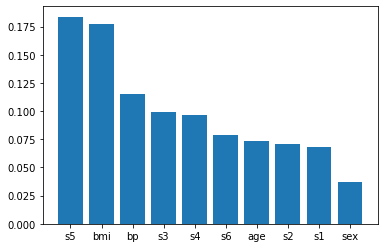

[('s5', 0.1837081140392543),
 ('bmi', 0.17688022101462164),
 ('bp', 0.11483674162387485),
 ('s3', 0.09954357135996396),
 ('s4', 0.09653240006443818)]

In [389]:
FeatureSelection(X,y,data_nor,k = 5,d_type='ETC')

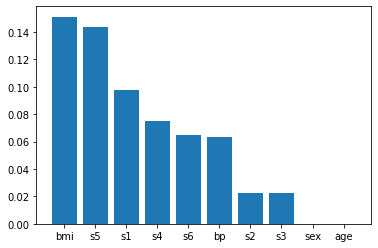

[('bmi', 0.1510119883562988),
 ('s5', 0.1436598822829538),
 ('s1', 0.09748582637281555),
 ('s4', 0.07477021205623857),
 ('s6', 0.06487119812597508)]

In [390]:
FeatureSelection(X,y,data_nor,k = 5,d_type='MIC')

# 4 - Analyzing few positive and negative examples

In [36]:
# Get few predictions from the trained decision tree model.
# YOUR CODE HERE
# 4.1
def ModelIntepretability(df,model,n=4):# n:number of examples
  # Input: Decision Tree Model 
  # Output: An explanation based on the decision tree model for 3-4 randomly selected positive and negative examples.
  # Hint: For any given example, walk through the decision tree from the root to the prediction and write code to automatically construct a sentence to explain the same.
    samples = df.sample(n)
    
    feature_name = list(samples.columns)
    feature_name.pop()
    print(samples)
    
    dot_data = tree.export_graphviz(model,
                                    out_file = None,
                                    feature_names= feature_name,
                                    class_names=['0','1'],
                                    filled=True,
                                    rounded=True)
    graph = graphviz.Source(dot_data)
    
    print(tree.export_text(DT_model,feature_names=list(feature_name)))
    
    graph.save('tree_sample.dot')
    ''' 
    it should take the cmd commend 'dot -Tpng wine_tree.dot -o tree.png' 
    to transfer the type from '.dot' to '.png'

    '''

# 4.2
# Also, for the report - Discuss any patterns or insights you notice when you look at explaining the positive/negative examples above.

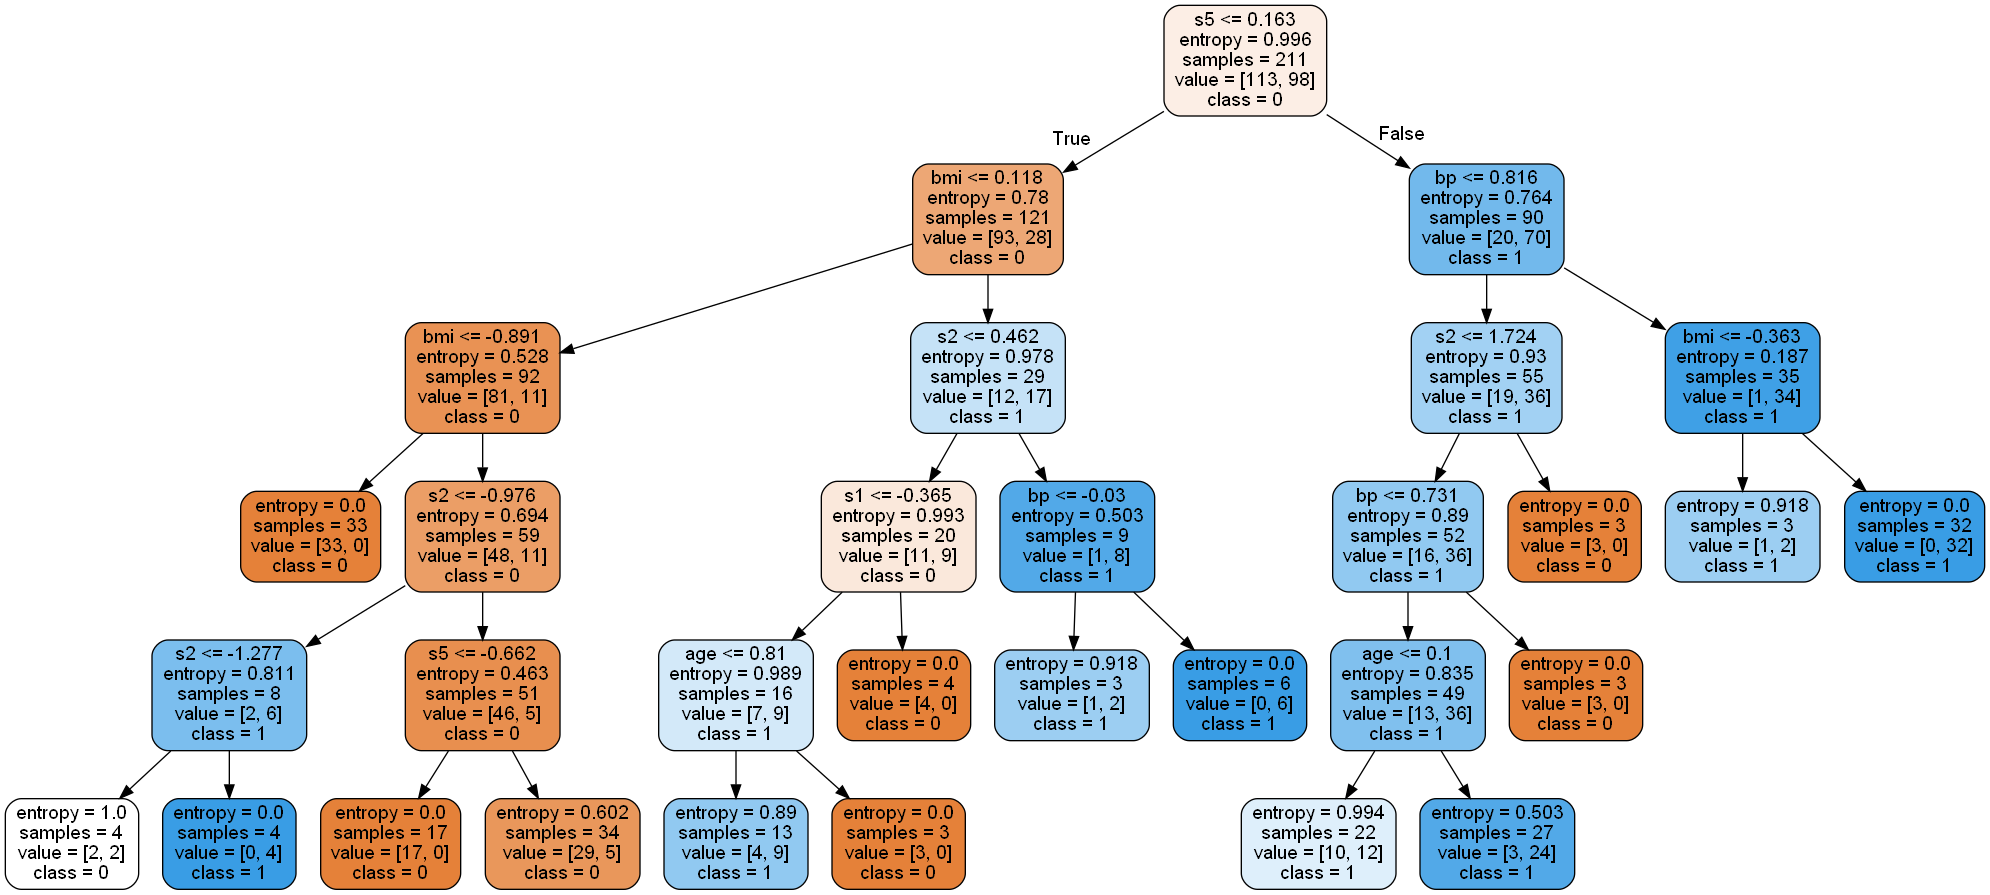

In [297]:
Image('t.png')

In [52]:
ModelIntepretability(data_nor,DT_model)

          age       sex       bmi        bp        s1        s2        s3  \
196  0.376018 -0.926906  1.631941 -0.863052 -0.063437 -0.289447 -0.383671   
238 -0.175913 -0.926906  0.857485 -0.838777 -0.565861 -0.053025 -1.062041   
253 -0.097066  1.078858  0.059560 -1.795049 -0.230912 -0.365712  1.057865   
66   0.849102  1.078858 -0.175124  0.068210  0.070542  0.953677 -1.316430   

           s4        s5        s6  target  
196  0.092857  1.004535  1.148019     1.0  
238  0.509122 -0.073234  0.757204     1.0  
253 -0.848263 -0.881663 -1.978501     0.0  
66   1.350701 -0.540131  2.613575     0.0  
|--- s5 <= -0.18
|   |--- bmi <= 0.09
|   |   |--- bmi <= -0.77
|   |   |   |--- class: 0.0
|   |   |--- bmi >  -0.77
|   |   |   |--- s2 <= -0.60
|   |   |   |   |--- s6 <= -0.46
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- s6 >  -0.46
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- s2 >  -0.60
|   |   |   |   |--- bp <= -0.21
|   |   |   |   |   |--- class: 0.0
|   |   |  

# 5 - AUC for both the models

In [65]:
# Plot the F1score for different threshold values for both the models on the same graph.
y_score = DT_model.predict_proba(X_test)
y_score_lr = LR_model.predict_proba(X_test)
def PlotF1AUC():
  # Your code here
    fpr,tpr,threshold = roc_curve(y_test, [[i[1]] for i in y_score]) 
    roc_auc = auc(fpr,tpr)
    fpr_lr,tpr_lr,threshold_lr = roc_curve(y_test, [[i[1]] for i in y_score_lr])
    roc_auc_lr = auc(fpr_lr,tpr_lr) 
    print(fpr.shape, tpr.shape, threshold.shape)
    print('DT threshold= \n',threshold)
    print(fpr_lr.shape, tpr_lr.shape, threshold_lr.shape)
    print('LR threshold= \n',threshold_lr)
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='DT ROC curve (area = %0.2f)' % roc_auc) 
    plt.plot(fpr_lr, tpr_lr, color='darkred',
             lw=lw, label='LR ROC curve (area = %0.2f)' % roc_auc_lr) 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()


(8,) (8,) (8,)
DT threshold= 
 [2.         1.         0.66666667 0.61904762 0.46666667 0.33333333
 0.16666667 0.        ]
(16,) (16,) (16,)
LR threshold= 
 [1.98676977 0.98676977 0.69775424 0.69183273 0.52658708 0.52234623
 0.4704232  0.46634519 0.43092053 0.40986312 0.38388637 0.24824044
 0.22646204 0.21851856 0.17861255 0.00717738]
<Figure size 432x288 with 0 Axes>



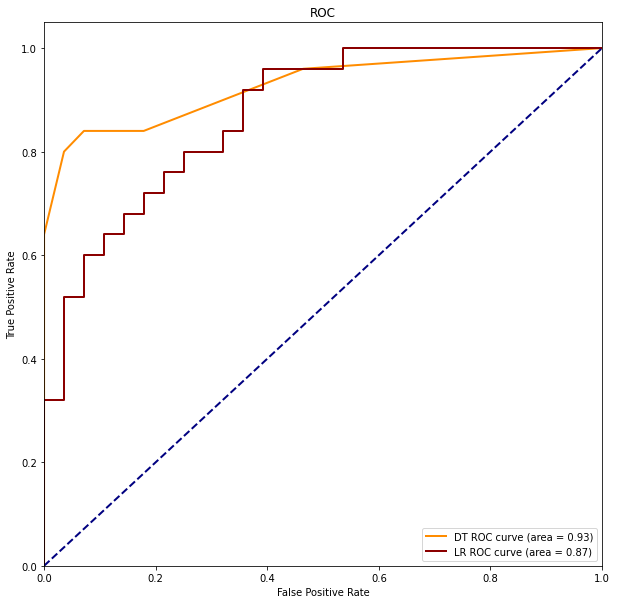

In [71]:
PlotF1AUC()